# ============================================================
# High School Directory Analysis
# Data Loading, Cleaning, Filtering, Aggregation & Visualization
# ============================================================

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
## 1. Load the dataset
# ------------------------------------------------------------

In [3]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("day_2_datasets/high-school-directory.csv")
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


# ------------------------------------------------------------
## 2. Clean column names
# ------------------------------------------------------------

In [4]:
# Clean column names:
# - lowercase
# - replace spaces with underscores
# - remove special characters
df.columns = (df.columns.str.lower().str.replace(" ",
                                                 "_").str.replace(r"[^\w_]",
                                                                  "",
                                                                  regex=True))

# Quick check
df.columns

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

# ------------------------------------------------------------
## 3. Select relevant columns and assess data quality
# ------------------------------------------------------------

In [43]:
# Columns required for the analysis:
# - borough: geographic filtering and grouping
# - dbn: unique school identifier
# - grade_span_min / grade_span_max: grade eligibility
# - total_students: aggregation and averages
cols = ["borough", "dbn", "grade_span_min", "grade_span_max", "total_students"]

print("===== Number of missing values per column: =====")
print(f'\n{df[cols].isna().sum()}')

# Notes:
# - 'borough' and 'dbn' contain no missing values → safe to use
# - 'grade_span_min' has missing values → drop rows only where grade analysis is required
# - 'total_students' has missing values → pandas ignores NaNs when computing means

===== Number of missing values per column: =====

borough           0
dbn               0
grade_span_min    3
grade_span_max    0
total_students    9
dtype: int64


In [6]:
# Check for duplicate school identifiers
df["dbn"].duplicated().sum()

# Identify invalid grade ranges (min > max)
df[df["grade_span_min"] > df["grade_span_max"]][[
    "dbn", "grade_span_min", "grade_span_max"
]]

,dbn,grade_span_min,grade_span_max


# ------------------------------------------------------------
## 4. Filter schools located in Brooklyn
# ------------------------------------------------------------

In [ ]:
df_brooklyn = df[df["borough"].str.lower() == "brooklyn"]

# ------------------------------------------------------------
## 5. Number of unique schools in Brooklyn
# ------------------------------------------------------------

In [49]:
# Using the unique school identifier (dbn)
sum_schools_brooklyn_unique = df_brooklyn["dbn"].nunique()
print(f"Number of unique schools in Brooklyn: {sum_schools_brooklyn_unique}")

Number of unique schools in Brooklyn: 121


# ------------------------------------------------------------
## 6. Schools in Brooklyn that accept 9th-grade students
# ------------------------------------------------------------

In [52]:
print(f"=====Value counts for minimum grade entry:=====\n"
      f"{df['grade_span_min'].value_counts()}")

print(f"\n=====Value counts for maximum grade entry:=====\n"
      f"{df['grade_span_max'].value_counts()}")

=====Value counts for minimum grade entry:=====
grade_span_min
9.0    351
6.0     79
7.0      2
Name: count, dtype: int64

=====Value counts for maximum grade entry:=====
grade_span_max
12    404
11     19
10      9
9       3
Name: count, dtype: int64


In [51]:
# Remove rows with missing grade span information
brooklyn_grades = df_brooklyn.dropna(
    subset=["grade_span_min", "grade_span_max"])

schools_accepting_9th = brooklyn_grades[
    (brooklyn_grades["grade_span_min"] <= 9)
    & (brooklyn_grades["grade_span_max"] >= 9)]

num_schools_9th = schools_accepting_9th["dbn"].nunique()
print(
    f"Number of schools accepting 9th graders in Brooklyn: {num_schools_9th}")


Number of schools accepting 9th graders in Brooklyn: 121


# ------------------------------------------------------------
## 7. Grouping and aggregation by borough
# ------------------------------------------------------------

### a) Number of unique schools per borough

===== Number of Schools per Borough: =====


borough
Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64

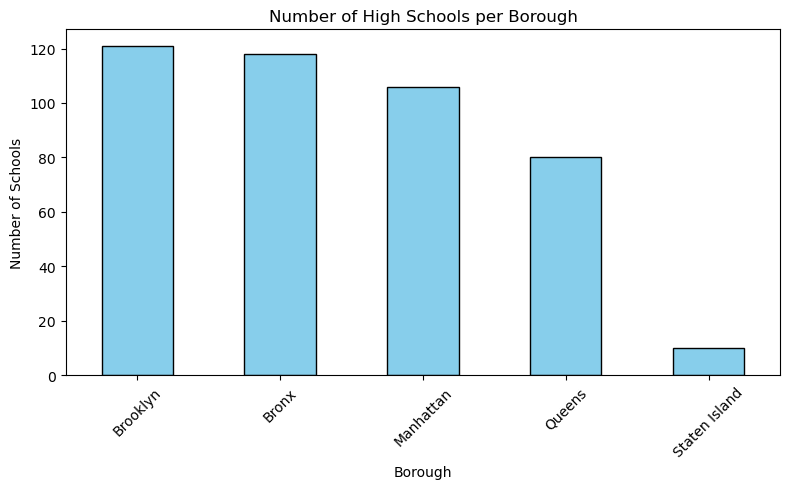

In [ ]:
schools_per_borough = df.groupby('borough')['dbn'].nunique().sort_values(
    ascending=False)

print("===== Number of Schools per Borough: =====")
display(schools_per_borough)

# -------------------------------
# Visualization 1: Number of Schools per Borough
# -------------------------------
plt.figure(figsize=(8, 5))
schools_per_borough.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Number of High Schools per Borough")
plt.ylabel("Number of Schools")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### b) Average number of students per borough

===== Average Number of Students per School by Borough: =====


borough
Bronx             490.4
Brooklyn          699.1
Manhattan         589.8
Queens           1046.6
Staten Island    1847.5
Name: total_students, dtype: float64

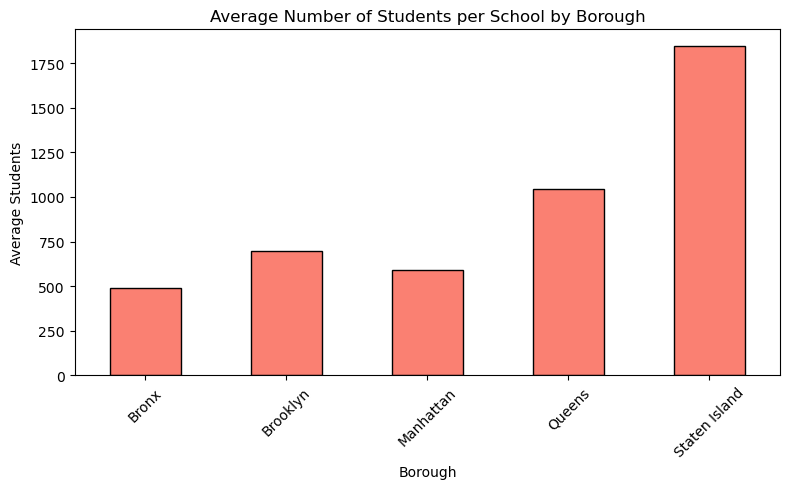

In [ ]:
avg_students_per_borough = (
    df.groupby("borough")
    ["total_students"]  # NaN values in 'total_students' are ignored automatically
    .mean().round(1))

print("===== Average Number of Students per School by Borough: =====")
display(avg_students_per_borough)

# -------------------------------
# Visualization: Average Students per Borough
# -------------------------------
plt.figure(figsize=(8, 5))
avg_students_per_borough.plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Average Number of Students per School by Borough")
plt.ylabel("Average Students")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### c) Summary statistics for maximum grade span per borough

In [55]:
grade_span_summary = (df.groupby("borough")["grade_span_max"].describe())
print("===== Grade Span Max Summary by Borough: =====")
display(grade_span_summary)

===== Grade Span Max Summary by Borough: =====


,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,118.0,11.906780,0.369506,9.0,12.0,12.0,12.0,12.0
Brooklyn,121.0,11.933884,0.381566,9.0,12.0,12.0,12.0,12.0
Manhattan,106.0,11.877358,0.472135,9.0,12.0,12.0,12.0,12.0
Queens,80.0,11.825000,0.497462,10.0,12.0,12.0,12.0,12.0
Staten Island,10.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0



### Summary DataFrame per borough


In [57]:
summary_df = pd.DataFrame({
    "Number of Schools": df.groupby("borough")["dbn"].nunique(),
    "Average Students": df.groupby("borough")["total_students"].mean().round(1),
    "Grade Max Mean": df.groupby("borough")["grade_span_max"].mean().round(2),
    "Grade Min Mean": df.groupby("borough")["grade_span_min"].mean().round(2)
})

# Sort by number of schools for readability
summary_df = summary_df.sort_values("Number of Schools", ascending=False)

print("===== Summary of High Schools per Borough =====")
display(summary_df)
print("\n")

===== Summary of High Schools per Borough =====


,Number of Schools,Average Students,Grade Max Mean,Grade Min Mean
borough,,,,
Brooklyn,121,699.1,11.93,8.43
Bronx,118,490.4,11.91,8.42
Manhattan,106,589.8,11.88,8.48
Queens,80,1046.6,11.82,8.39
Staten Island,10,1847.5,12.00,9.00


# Key Insights from the NYC High School Dataset

## Brooklyn has the highest number of high schools among all boroughs
- Brooklyn has **121 unique high schools**, the largest count of any borough.  
- All Brooklyn schools accept 9th-grade students, highlighting broad coverage from the typical high school entry point.  
- The **average minimum grade** in Brooklyn schools is **8.43**, indicating that some schools also include middle school grades (e.g., grade 6–8 programs).

## Most schools start around grade 8–9 and end at grade 12, with minor variations
- Schools in all boroughs have a **maximum grade mean** between **11.82 and 12.00**, confirming that nearly all schools provide a full high school education up to grade 12.  
- Average **minimum grades** range from **8.39 (Queens)** to **9.00 (Staten Island)**, suggesting that while most schools start at grade 9, a notable number of schools include lower grades.  
- This indicates that certain schools integrate middle school programs into their campus.

## Average school size differs substantially across boroughs
- Brooklyn schools have an average of **699 students per school**, Bronx **490**, Manhattan **590**, Queens **1,047**, and Staten Island **1,848**.  
- Staten Island has the fewest schools (**10**), but they are much larger on average, while Brooklyn and Manhattan have more moderately sized schools.  
- These differences reflect borough population distribution and capacity planning.

## Additional observation: school grade structures are generally consistent across boroughs
- Despite minor variations in starting grades, almost all schools reach grade 12.  
- Boroughs with lower average starting grades, like **Queens (8.39)** and **Brooklyn (8.43)**, suggest a mix of traditional high schools and combined middle-high school programs.
